In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import warnings
warnings.filterwarnings('ignore')

In [ ]:
data = pd.read_csv(r'/content/stock_dataset.csv')

In [ ]:
data.head()

,SYMBOL,Industry,Sector,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,forward PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,ROA,ROE,Volume,DebtToEquity
0,TORNTPHARM,Drug Manufacturers - Specialty & Generic,Healthcare,3590.70,1161830858752,28.0,64.515130,NaN,10.351456,0.16058,0.25649,0.086,0.174,0.11713,0.25366,551862,41.658
1,GODREJCP,Household & Personal Products,Consumer Defensive,1541.85,1321671852032,25.0,NaN,58.507023,9.411498,-0.02636,0.19409,0.018,0.135,0.09312,-0.02776,3223334,31.458
2,ITC,Tobacco,Consumer Defensive,528.50,6033428185088,15.0,29.408537,24.925064,8.030088,0.27338,0.30100,0.167,0.018,0.17000,0.28645,30957425,0.402
3,PIDILITIND,Specialty Chemicals,Basic Materials,3415.00,1616858447872,16.0,84.749405,156.985180,12.769276,0.15105,0.21049,0.052,0.185,0.13292,0.23137,479931,4.253
4,AXISBANK,Banks - Regional,Financial Services,1339.65,3679420678144,1.0,13.244431,NaN,5.511118,0.41832,0.47516,0.102,0.188,0.01918,0.17765,12798222,NaN


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 751 entries, 0 to 750
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   SYMBOL             751 non-null    object 
 1   Industry           751 non-null    object 
 2   Sector             751 non-null    object 
 3   fiftyTwoWeekHigh   751 non-null    float64
 4   marketCap          751 non-null    int64  
 5   dividend Rate      595 non-null    float64
 6   trailing PE        703 non-null    float64
 7   forward PE         438 non-null    float64
 8   priceToSales       751 non-null    float64
 9   Profit Margins     748 non-null    float64
 10  Operating Margins  751 non-null    float64
 11  Revenue Growth     748 non-null    float64
 12  Earnings Growth    660 non-null    float64
 13  ROA                223 non-null    float64
 14  ROE                229 non-null    float64
 15  Volume             751 non-null    int64  
 16  DebtToEquity       687 non

In [ ]:
## I will try by removing ROA, ROE and forwardPE features from dataset

new_data = data.drop(['ROA', 'ROE', 'forward PE'], axis=1)

In [ ]:
new_data.isna().sum()

# need to look for dividend Rate, trailing PE, Earnings Growth, DebtToEquity
# Profit Margins and Revenue Growth can be handled easily

,0
SYMBOL,0
Industry,0
Sector,0
fiftyTwoWeekHigh,0
marketCap,0
dividend Rate,156
trailing PE,48
priceToSales,0
Profit Margins,3
Operating Margins,0


In [ ]:
new_data.describe()

,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity
count,751.000000,7.510000e+02,595.000000,703.000000,751.000000,748.000000,751.000000,748.000000,660.000000,7.510000e+02,687.000000
mean,2391.979400,5.856920e+11,16.672067,74.676921,19.202629,0.141745,0.047992,0.211322,0.384947,3.823380e+06,63.318544
std,7077.389865,1.780076e+12,60.354407,413.425540,317.564627,0.281184,2.954607,1.309355,2.015433,2.322088e+07,121.762374
min,19.180000,1.987562e+10,0.050000,0.387687,-55.120530,-2.277640,-79.430770,-0.997000,-0.986000,2.793000e+03,0.001000
25%,427.000000,7.795739e+10,2.000000,21.786198,2.157212,0.055502,0.074755,0.015750,-0.066250,1.705395e+05,4.788000
50%,905.000000,1.662004e+11,5.000000,38.755814,4.109136,0.105920,0.134990,0.109000,0.139000,5.315050e+05,22.119000
75%,2032.475000,4.547942e+11,11.250000,63.090871,8.218265,0.186263,0.236695,0.211000,0.393250,2.147868e+06,68.908000
max,151445.000000,3.622693e+13,1200.000000,10603.125000,8688.897000,4.126810,2.314850,31.662000,37.000000,6.009209e+08,1558.415000


In [ ]:
def plot_(df):
  # Determine the number of columns with missing values
  num_plots = sum(new_data.iloc[:, i].isna().sum() > 0 for i in range(len(new_data.columns)))

  # Create a grid of subplots
  cols = 3  # Number of columns in the grid (adjust as needed)
  rows = (num_plots + cols - 1) // cols  # Calculate the number of rows

  fig, axes = plt.subplots(rows, cols, figsize=(15, rows * 5))
  axes = axes.flatten()  # Flatten to easily index subplots

  # Loop through columns and plot where there are missing values
  plot_index = 0
  for i in range(len(new_data.columns)):
      if new_data.iloc[:, i].isna().sum() > 0:
          sns.histplot(new_data.iloc[:, i], kde=True, ax=axes[plot_index])  # You can replace with distplot if using older Seaborn versions
          axes[plot_index].set_title(f"Distribution of {new_data.columns[i]}")
          plot_index += 1

  # Hide any extra subplots
  for j in range(plot_index, len(axes)):
      axes[j].set_visible(False)

  plt.tight_layout()
  plt.show()

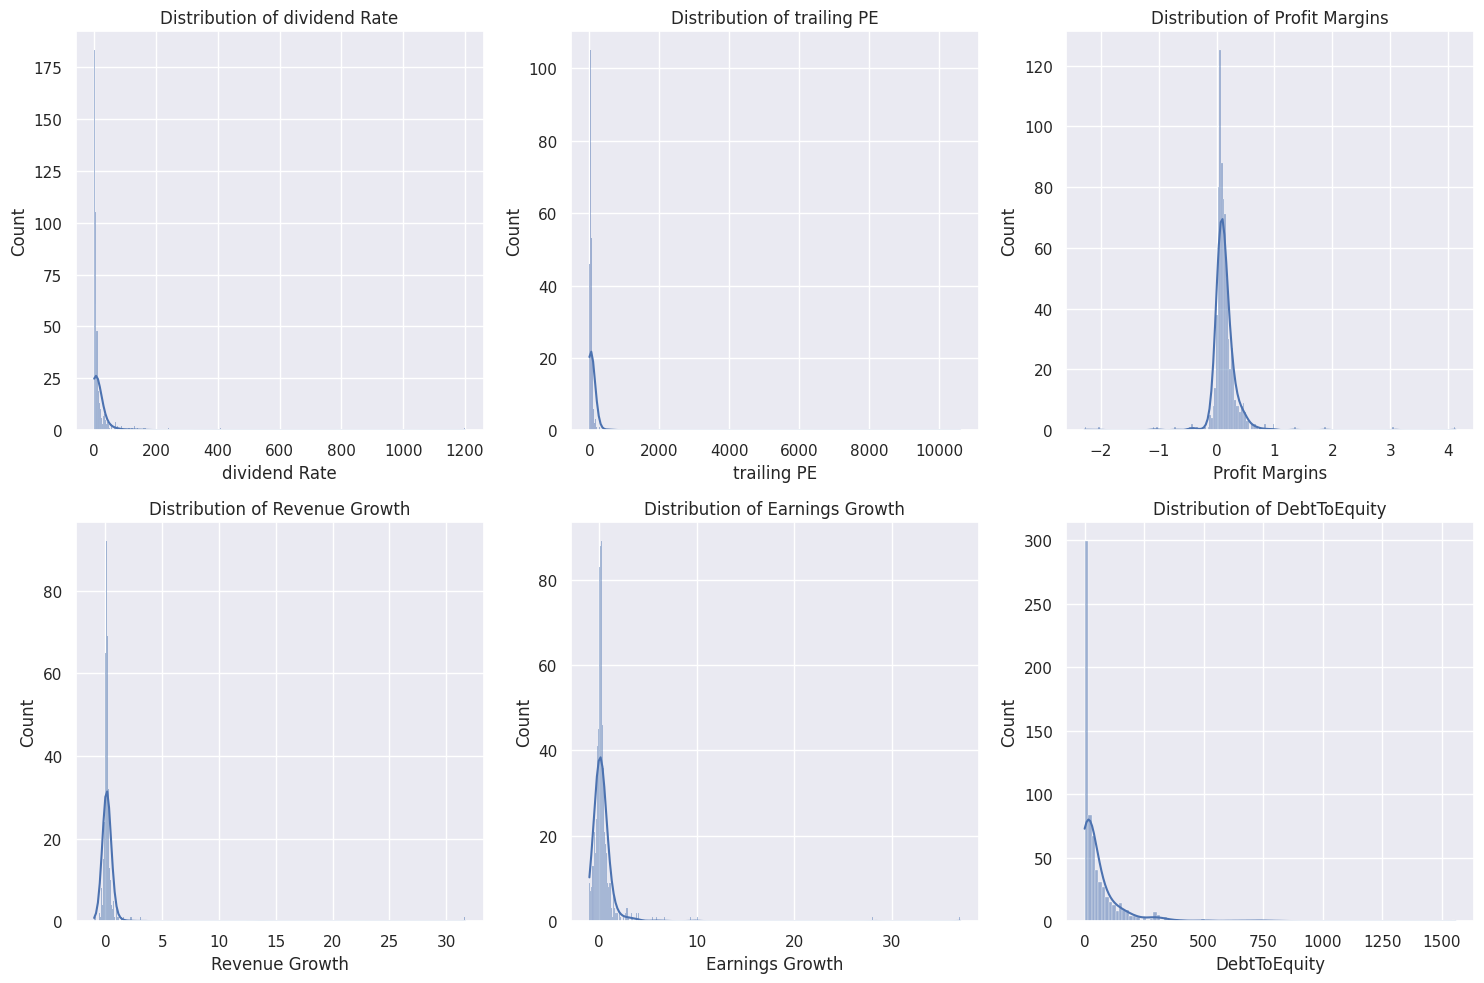

In [ ]:
plot_(new_data)

Need to handle the missing values w.r.t the sector/industry wise

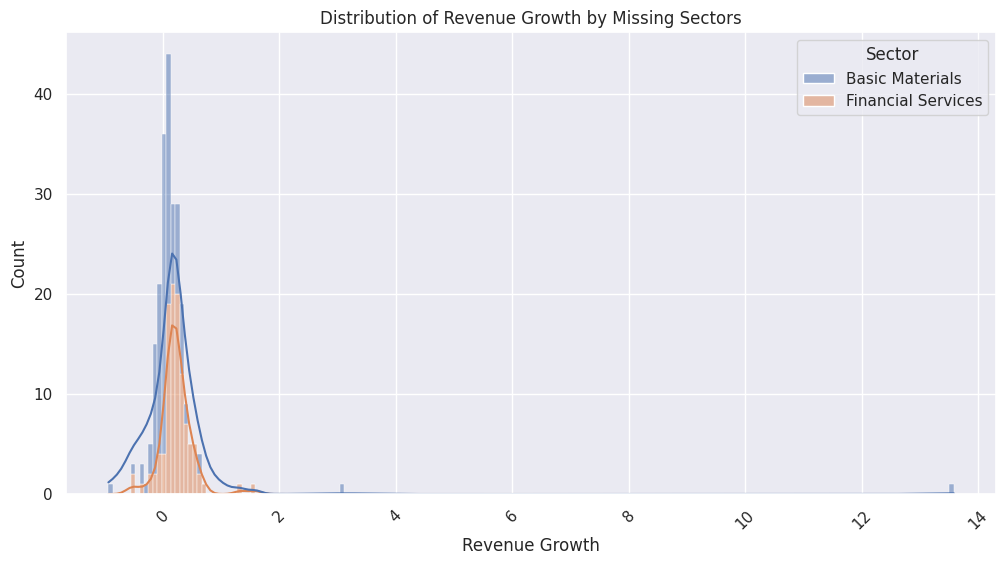

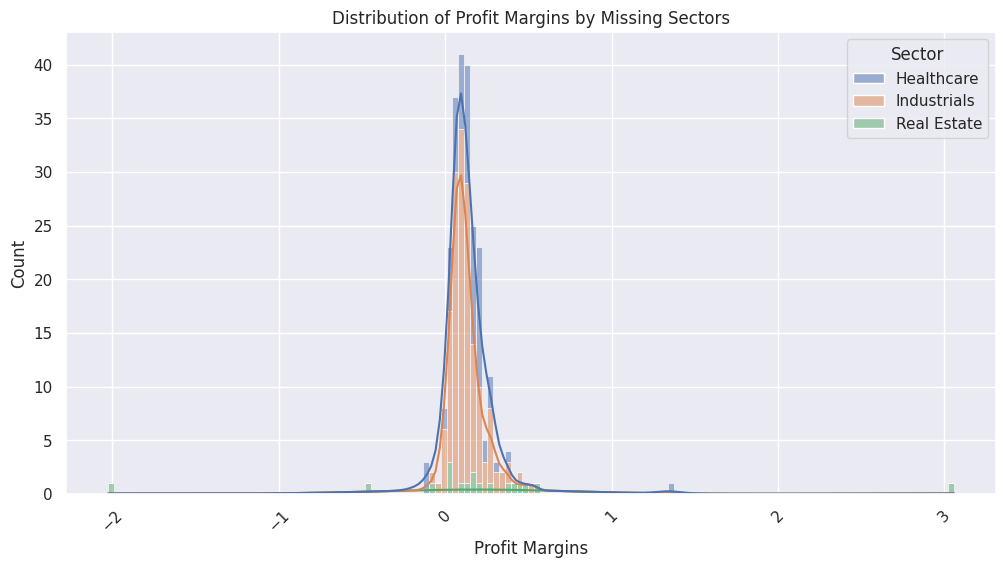

In [ ]:
features_to_check = ["Revenue Growth", "Profit Margins"]

# Loop through only the columns you're interested in
for col in features_to_check:
    if col in new_data.columns:
        # Filter to only include sectors with missing values in the current column
        missing_sectors = new_data[new_data[col].isna()]['Sector'].unique()
        filtered_data = new_data[new_data['Sector'].isin(missing_sectors)]

        plt.figure(figsize=(12, 6))
        sns.histplot(data=filtered_data, x=col, hue='Sector', kde=True, multiple="stack")
        plt.title(f"Distribution of {col} by Missing Sectors")
        plt.xticks(rotation=45)
        plt.show()


BY above graphs I can be fill the missing values of Profit Margins and Revenue Growth wi the mean of it's feature because the sectors are normally distributed.

In [ ]:
new_data["Revenue Growth"].fillna(new_data["Revenue Growth"].mean(), inplace=True)
new_data["Profit Margins"].fillna(new_data["Profit Margins"].mean(), inplace=True)

In [ ]:
new_data.columns[new_data.isna().any()].tolist()

['dividend Rate', 'trailing PE', 'Earnings Growth', 'DebtToEquity']

In [ ]:
def plot_missing_features(new_data):
  for col in new_data.columns:
      if new_data[col].isna().sum() > 0:
          # Filter to only include sectors with missing values in the current column
          missing_sectors = new_data[new_data[col].isna()]['Sector'].unique()
          filtered_data = new_data[new_data['Sector'].isin(missing_sectors)]

          plt.figure(figsize=(12, 6))
          sns.boxplot(x='Sector', y=col, data=filtered_data)
          plt.title(f"Distribution of {col} by Missing Sectors")
          plt.xticks(rotation=45)
          plt.show()

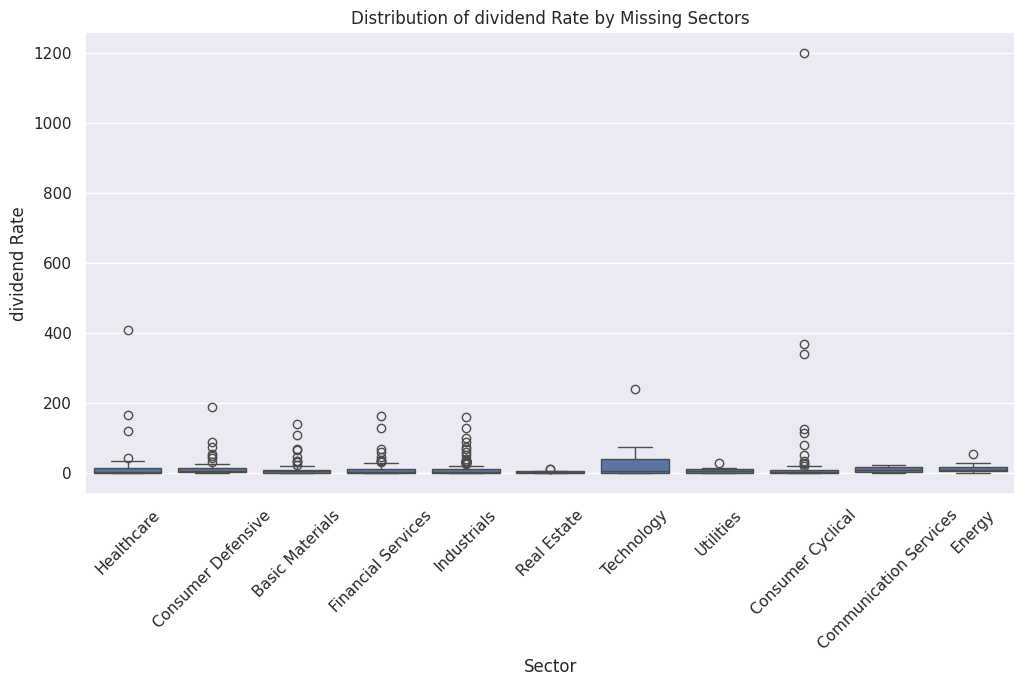

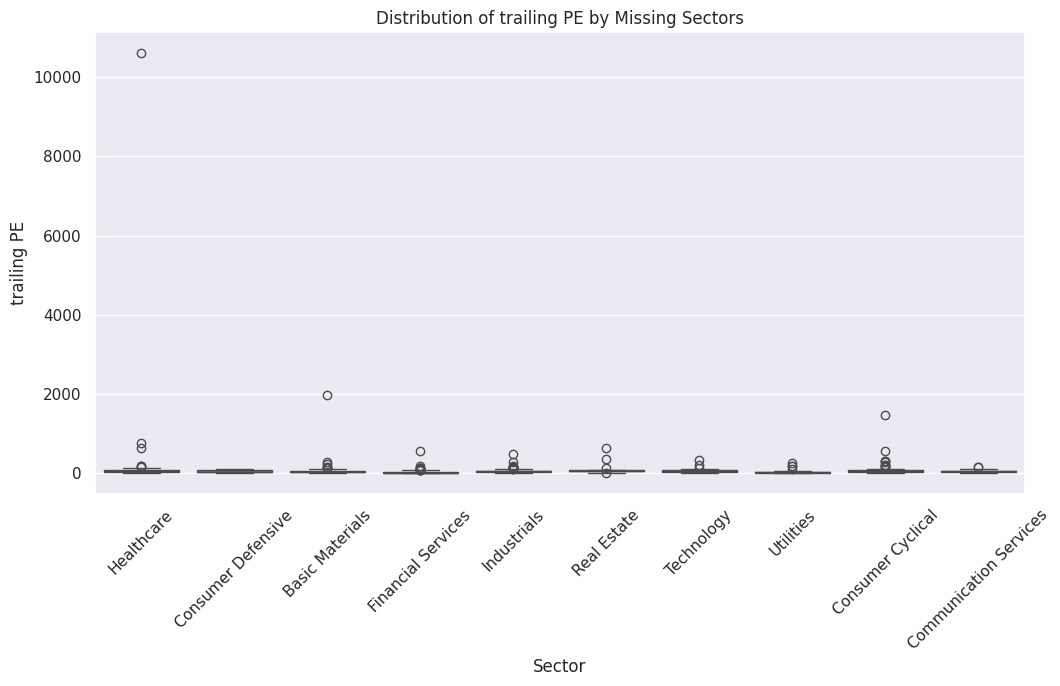

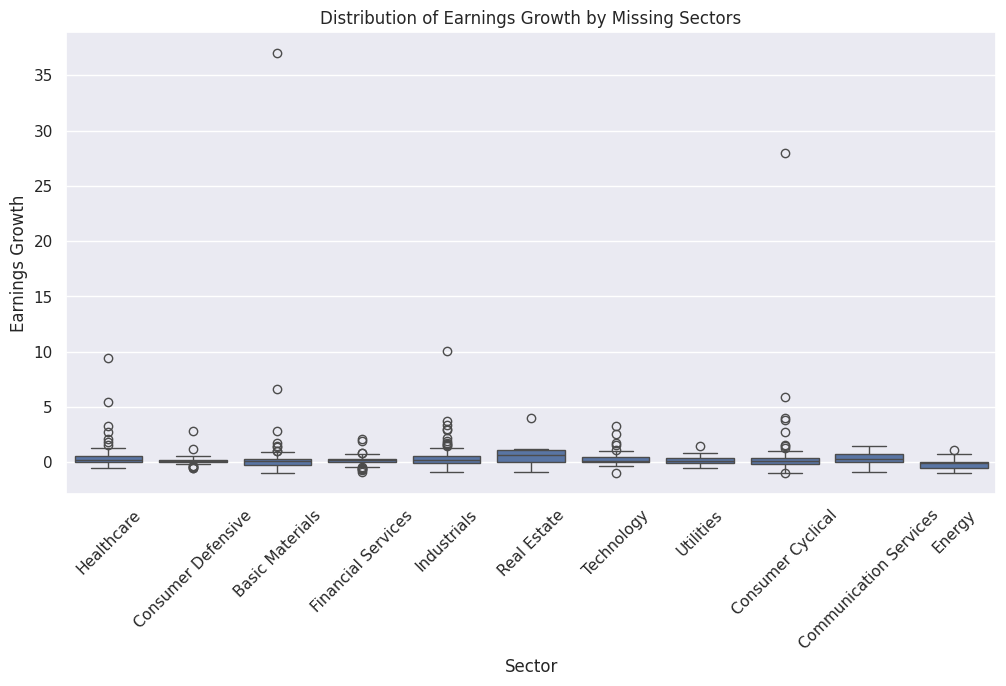

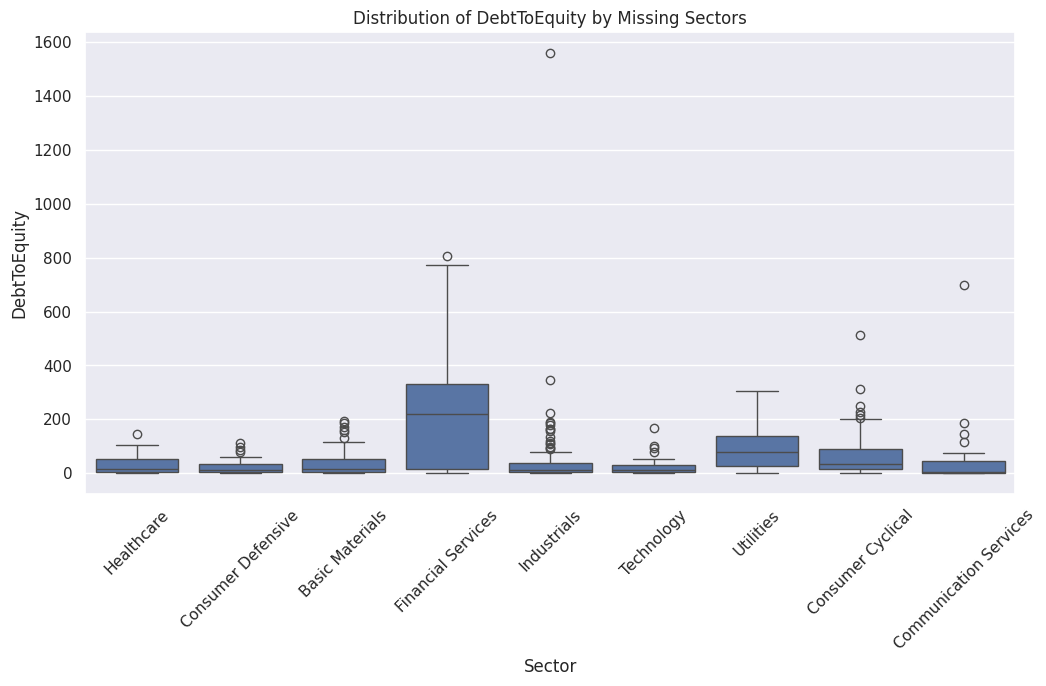

In [ ]:
plot_missing_features(new_data)

In [ ]:
def handling_missing_values():
  for col in new_data.columns:
    if new_data[col].isna().sum() > 0:  # Check if column has missing values
        new_data[col] = new_data.groupby('Industry')[col].transform(lambda x: x.fillna(x.mean()))

  return new_data

In [ ]:
cleaned_data = handling_missing_values()

In [ ]:
cleaned_data.isna().sum()

,0
SYMBOL,0
Industry,0
Sector,0
fiftyTwoWeekHigh,0
marketCap,0
dividend Rate,17
trailing PE,2
priceToSales,0
Profit Margins,0
Operating Margins,0


In [ ]:
cat_columns = cleaned_data.select_dtypes(include="object").columns

In [ ]:
cat_columns

Index(['SYMBOL', 'Industry', 'Sector'], dtype='object')

In [ ]:
cleaned_data["Industry"].nunique()

106

In [ ]:
cleaned_data["Sector"].nunique()

11

In [ ]:
cleaned_data["Industry"].unique()

array(['Drug Manufacturers - Specialty & Generic',
       'Household & Personal Products', 'Tobacco', 'Specialty Chemicals',
       'Banks - Regional', 'Beverages - Wineries & Distilleries',
       'Aerospace & Defense', 'Packaged Foods', 'Asset Management',
       'Real Estate - Development', 'Information Technology Services',
       'Beverages - Non-Alcoholic',
       'Utilities - Independent Power Producers', 'Auto Parts',
       'Building Materials', 'Credit Services',
       'Drug Manufacturers - General', 'Medical Care Facilities',
       'Telecom Services', 'Discount Stores', 'Insurance - Life',
       'Specialty Industrial Machinery', 'Steel',
       'Oil & Gas Refining & Marketing', 'Internet Retail',
       'Auto Manufacturers', 'Utilities - Regulated Electric',
       'Insurance - Diversified', 'Electrical Equipment & Parts',
       'Internet Content & Information', 'Oil & Gas Integrated',
       'Financial Conglomerates', 'Apparel Retail', 'Aluminum',
       'Luxury Goods',

In [ ]:
cleaned_data["Sector"].unique()

array(['Healthcare', 'Consumer Defensive', 'Basic Materials',
       'Financial Services', 'Industrials', 'Real Estate', 'Technology',
       'Utilities', 'Consumer Cyclical', 'Communication Services',
       'Energy'], dtype=object)

In [ ]:
# Removing the Industry feature from dataset can simplifies our work
cleaned_data.drop("Industry", axis=1, inplace=True)

In [ ]:
cleaned_data.describe()

,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity
count,751.000000,7.510000e+02,734.000000,749.000000,751.000000,751.000000,751.000000,751.000000,747.000000,7.510000e+02,750.000000
mean,2391.979400,5.856920e+11,15.717475,75.261690,19.202629,0.141745,0.047992,0.211322,0.372029,3.823380e+06,61.644984
std,7077.389865,1.780076e+12,55.191291,401.191646,317.564627,0.280621,2.954607,1.306734,1.899281,2.322088e+07,117.271800
min,19.180000,1.987562e+10,0.050000,0.387687,-55.120530,-2.277640,-79.430770,-0.997000,-0.986000,2.793000e+03,0.001000
25%,427.000000,7.795739e+10,2.000000,23.031207,2.157212,0.056065,0.074755,0.016500,-0.054500,1.705395e+05,5.758000
50%,905.000000,1.662004e+11,5.000000,39.694836,4.109136,0.106630,0.134990,0.110000,0.147000,5.315050e+05,26.023500
75%,2032.475000,4.547942e+11,12.000000,64.094880,8.218265,0.185170,0.236695,0.211322,0.413500,2.147868e+06,64.571750
max,151445.000000,3.622693e+13,1200.000000,10603.125000,8688.897000,4.126810,2.314850,31.662000,37.000000,6.009209e+08,1558.415000


In [ ]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

In [ ]:
cleaned_data.select_dtypes(include="object").columns

Index(['SYMBOL', 'Sector'], dtype='object')

In [ ]:
cleaned_data["Sector"].unique()

array(['Healthcare', 'Consumer Defensive', 'Basic Materials',
       'Financial Services', 'Industrials', 'Real Estate', 'Technology',
       'Utilities', 'Consumer Cyclical', 'Communication Services',
       'Energy'], dtype=object)

In [ ]:
map_sectors = {}

for i, sector in enumerate(cleaned_data["Sector"].unique()):
  cleaned_data["Sector"].replace(sector, i, inplace=True)
  map_sectors[sector] = i


In [ ]:
map_sectors

{'Healthcare': 0,
 'Consumer Defensive': 1,
 'Basic Materials': 2,
 'Financial Services': 3,
 'Industrials': 4,
 'Real Estate': 5,
 'Technology': 6,
 'Utilities': 7,
 'Consumer Cyclical': 8,
 'Communication Services': 9,
 'Energy': 10}

In [ ]:
cleaned_data.head()

,SYMBOL,Sector,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity
0,TORNTPHARM,0,3590.70,1161830858752,28.0,64.515130,10.351456,0.16058,0.25649,0.086,0.174,551862,41.658
1,GODREJCP,1,1541.85,1321671852032,25.0,60.739635,9.411498,-0.02636,0.19409,0.018,0.135,3223334,31.458
2,ITC,1,528.50,6033428185088,15.0,29.408537,8.030088,0.27338,0.30100,0.167,0.018,30957425,0.402
3,PIDILITIND,2,3415.00,1616858447872,16.0,84.749405,12.769276,0.15105,0.21049,0.052,0.185,479931,4.253
4,AXISBANK,3,1339.65,3679420678144,1.0,13.244431,5.511118,0.41832,0.47516,0.102,0.188,12798222,29.948


In [ ]:
# le = LabelEncoder()

# cleaned_data["Sector"] = le.fit_transform(cleaned_data["Sector"])

In [ ]:
cleaned_data

,SYMBOL,Sector,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity
0,TORNTPHARM,0,3590.70,1161830858752,28.00,64.515130,10.351456,0.16058,0.25649,0.086,0.174000,551862,41.6580
1,GODREJCP,1,1541.85,1321671852032,25.00,60.739635,9.411498,-0.02636,0.19409,0.018,0.135000,3223334,31.4580
2,ITC,1,528.50,6033428185088,15.00,29.408537,8.030088,0.27338,0.30100,0.167,0.018000,30957425,0.4020
3,PIDILITIND,2,3415.00,1616858447872,16.00,84.749405,12.769276,0.15105,0.21049,0.052,0.185000,479931,4.2530
4,AXISBANK,3,1339.65,3679420678144,1.00,13.244431,5.511118,0.41832,0.47516,0.102,0.188000,12798222,29.9480
...,...,...,...,...,...,...,...,...,...,...,...,...,...
746,JCHAC,8,2620.10,66193453056,2.61,196.040040,2.686848,0.01129,-0.11421,0.415,0.399556,111405,6.7570
747,IFBIND,8,2359.90,92127657984,2.61,92.595894,1.993635,0.01916,0.04084,0.169,0.399556,137707,22.8730
748,VSTIND,1,486.15,58882461696,13.64,21.738977,4.149562,0.17129,0.15740,0.030,-0.374000,1474418,4.2755
749,GLS,0,1335.10,131515817984,43.50,27.247389,5.964717,0.19207,0.23529,-0.149,-0.200000,566189,0.6290


In [ ]:
cleaned_data["Market_cap(Billion)"] = cleaned_data["marketCap"] / 1e9

In [ ]:
cleaned_data.head()

,SYMBOL,Sector,fiftyTwoWeekHigh,marketCap,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity,Market_cap(Billion)
0,TORNTPHARM,0,3590.70,1161830858752,28.0,64.515130,10.351456,0.16058,0.25649,0.086,0.174,551862,41.658,1161.830859
1,GODREJCP,1,1541.85,1321671852032,25.0,60.739635,9.411498,-0.02636,0.19409,0.018,0.135,3223334,31.458,1321.671852
2,ITC,1,528.50,6033428185088,15.0,29.408537,8.030088,0.27338,0.30100,0.167,0.018,30957425,0.402,6033.428185
3,PIDILITIND,2,3415.00,1616858447872,16.0,84.749405,12.769276,0.15105,0.21049,0.052,0.185,479931,4.253,1616.858448
4,AXISBANK,3,1339.65,3679420678144,1.0,13.244431,5.511118,0.41832,0.47516,0.102,0.188,12798222,29.948,3679.420678


In [ ]:
# dropping marketCap feature

if "marketCap" in cleaned_data.columns:
    cleaned_df = cleaned_data.drop("marketCap", axis=1)

else:
    cleaned_df = cleaned_data.copy()


In [ ]:
# Convert the volume column to millions
cleaned_df['Volume'] = cleaned_df['Volume'] / 1_000_000

# Rename column to indicate the change to millions
cleaned_df.rename(columns={'Volume': 'Volume_in_millions'}, inplace=True)


In [ ]:
cleaned_df.head()

,SYMBOL,Sector,fiftyTwoWeekHigh,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume_in_millions,DebtToEquity,Market_cap(Billion)
0,TORNTPHARM,0,3590.70,28.0,64.515130,10.351456,0.16058,0.25649,0.086,0.174,0.551862,41.658,1161.830859
1,GODREJCP,1,1541.85,25.0,60.739635,9.411498,-0.02636,0.19409,0.018,0.135,3.223334,31.458,1321.671852
2,ITC,1,528.50,15.0,29.408537,8.030088,0.27338,0.30100,0.167,0.018,30.957425,0.402,6033.428185
3,PIDILITIND,2,3415.00,16.0,84.749405,12.769276,0.15105,0.21049,0.052,0.185,0.479931,4.253,1616.858448
4,AXISBANK,3,1339.65,1.0,13.244431,5.511118,0.41832,0.47516,0.102,0.188,12.798222,29.948,3679.420678


In [ ]:
cleaned_df.isna().sum()

,0
SYMBOL,0
Sector,0
fiftyTwoWeekHigh,0
dividend Rate,17
trailing PE,2
priceToSales,0
Profit Margins,0
Operating Margins,0
Revenue Growth,0
Earnings Growth,4


In [ ]:
cleaned_df.dropna(axis=0, inplace=True)

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

In [ ]:
inputs = cleaned_df.drop("SYMBOL", axis=1)

In [ ]:
similarity_score_df = cosine_similarity(inputs)

In [ ]:
similarity_score_df[1]

array([0.92268014, 1.        , 0.71428773, 0.9645738 , 0.87092195,
       0.99146244, 0.76937127, 0.87840959, 0.91689898, 0.81995517,
       0.89190196, 0.99171448, 0.75840518, 0.90086713, 0.93634117,
       0.87449123, 0.85754635, 0.84702208, 0.99943977, 0.81791976,
       0.96170011, 0.77633627, 0.77754294, 0.94118655, 0.74605092,
       0.96950458, 0.99536228, 0.7885569 , 0.84017306, 0.99968763,
       0.7726386 , 0.96485428, 0.89861559, 0.90120105, 0.91794094,
       0.91431638, 0.90693656, 0.71502589, 0.79400017, 0.88590206,
       0.73910467, 0.75980142, 0.99840891, 0.95214226, 0.92660438,
       0.78466954, 0.99981845, 0.9997055 , 0.9738677 , 0.83100347,
       0.89454534, 0.99801623, 0.74291034, 0.72380455, 0.86151438,
       0.84201445, 0.94665268, 0.97227386, 0.79067797, 0.92126264,
       0.98716802, 0.91554086, 0.99759249, 0.85347786, 0.75374171,
       0.72231425, 0.98339334, 0.77321284, 0.97880028, 0.99897371,
       0.88273588, 0.93851628, 0.90407488, 0.81089596, 0.99967

In [ ]:
similarity_score_df.shape

(733, 733)

In [ ]:
cleaned_df[cleaned_df["SYMBOL"] == "AXISBANK"].index[0]

4

In [ ]:
sorted(list(enumerate(similarity_score_df[4])), reverse=True, key=lambda x:x[1])[1:10]

[(70, 0.9993736574006921),
 (63, 0.9991383757756341),
 (17, 0.9988794665242283),
 (16, 0.9986814525354906),
 (154, 0.99828554481841),
 (13, 0.9978673193638773),
 (15, 0.9976345591175334),
 (185, 0.9971527647506205),
 (107, 0.9970084374896246)]

In [ ]:
cleaned_df["SYMBOL"].iloc[154]

'BANKINDIA'

In [ ]:
def recommend(stock):
  movie_index = cleaned_df[cleaned_df["SYMBOL"] == stock].index[0]
  distances = similarity_score_df[movie_index]
  similar_stocks = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:11]

  for i in similar_stocks:
    print(cleaned_df["SYMBOL"].iloc[i[0]])

In [ ]:
recommend('HDFCBANK')

SBIN
ICICIBANK
ONGC
NTPC
PNB
BHARTIARTL
BEL
RELIANCE
GAIL
IDBI


**recommend by Sectors**

In [ ]:
def sector_stocks(sector):

  return cleaned_df[cleaned_df["Sector"] == sector]


In [ ]:
sector_dfs = {}

for key, value in map_sectors.items():
  sector_dfs[key] = cleaned_df[cleaned_df["Sector"] == value]

In [ ]:
for sector, df in sector_dfs.items():
  if sector == "Consumer Defensive":
    # print(f"\nDataFrame for sector: {sector}")
    print(df.head())  # Display the first few rows

       SYMBOL  Sector  fiftyTwoWeekHigh  dividend Rate  trailing PE  \
1    GODREJCP       1           1541.85           25.0    60.739635   
2         ITC       1            528.50           15.0    29.408537   
5    UNITDSPR       1           1647.50            9.0    74.084080   
7   BRITANNIA       1           6469.90           73.5    62.500275   
8  HINDUNILVR       1           3035.00           43.0    57.797210   

   priceToSales  Profit Margins  Operating Margins  Revenue Growth  \
1      9.411498        -0.02636            0.19409           0.018   
2      8.030088         0.27338            0.30100           0.167   
5      9.452369         0.12450            0.15225          -0.008   
7      8.159928         0.12902            0.15993           0.060   
8     10.006761         0.16452            0.21694           0.019   

   Earnings Growth  Volume_in_millions  DebtToEquity  Market_cap(Billion)  
1            0.135            3.223334        31.458          1321.671852  


In [ ]:
for sector, df in sector_dfs.items():
  print(sector)

Healthcare
Consumer Defensive
Basic Materials
Financial Services
Industrials
Real Estate
Technology
Utilities
Consumer Cyclical
Communication Services
Energy


In [ ]:
healthcare_df = sector_dfs.get("Healthcare")
finance_df = sector_dfs.get("Financial Services")
consumer_goods_df = pd.concat([sector_dfs["Basic Materials"], sector_dfs["Consumer Defensive"]], ignore_index=True)
real_estate_df = sector_dfs.get("Real Estate")
tech_stocks_df = sector_dfs.get("Technology")
comm_services_df = sector_dfs.get("Communication Services")
power_energy_stocks_df = pd.concat([sector_dfs["Utilities"], sector_dfs["Energy"]], ignore_index=True)
atomobile_df = sector_dfs.get("Consumer Cyclical")
electronics_stocks_df = sector_dfs.get("Industrials")

In [ ]:
# Define a function to recommend top stocks in a given sector
def recommend_stocks_by_sector(sector, top_n=5):
    sector_data = sector_stocks(sector)
    # Example: Sort by a specific column, like 'Revenue Growth' or 'Profit Margins'
    top_stocks = sector_data.sort_values(by='Revenue Growth', ascending=False).head(top_n)
    return top_stocks[['SYMBOL']]


In [ ]:
cleaned_df["Sector"].unique()[4]

4

In [ ]:
sector_len = cleaned_df["Sector"].nunique()

for i in range(sector_len):
    sector_name = cleaned_df["Sector"].unique()[i]
    print(f"\nTop stocks for sector: {sector_name}")
    print(recommend_stocks_by_sector(sector_name))



Top stocks for sector: 0
         SYMBOL
251        ERIS
508    YATHARTH
723  ORCHPHARMA
231     IPCALAB
262    ASTRAZEN

Top stocks for sector: 1
     SYMBOL
651  HNDFDS
382  RENUKA
518   DODLA
16      VBL
286  RADICO

Top stocks for sector: 2
         SYMBOL
388     NSLNISP
708  ORISSAMINE
707     SANDUMA
387        PCBL
716     EPIGRAL

Top stocks for sector: 3
       SYMBOL
192       BSE
473      IFCI
372       MCX
365      CDSL
24   HDFCBANK

Top stocks for sector: 4
         SYMBOL
652    ALLCARGO
352    INOXWIND
666      ZENTEC
714  LLOYDSENGG
355    JYOTICNC

Top stocks for sector: 5
         SYMBOL
465    DBREALTY
695     SUNTECK
113  GODREJPROP
741       EMBDL
368   SIGNATURE

Top stocks for sector: 6
       SYMBOL
366  TEJASNET
461       ITI
196     DIXON
592      PGEL
436     SYRMA

Top stocks for sector: 7
         SYMBOL
98   ADANIENSOL
83   ADANIGREEN
72   ADANIPOWER
176        SJVN
140  TORNTPOWER

Top stocks for sector: 8
       SYMBOL
346     AMBER
687     GOKEX
673 

**Saving the Files**

In [ ]:
import pickle

In [ ]:
popularity_based_stocks = cleaned_data.sort_values(by="Volume", ascending=False).head(10)

In [ ]:
popularity_based_stocks

,SYMBOL,Sector,fiftyTwoWeekHigh,dividend Rate,trailing PE,priceToSales,Profit Margins,Operating Margins,Revenue Growth,Earnings Growth,Volume,DebtToEquity,Market_cap(Billion)
191,IDEA,1,19.18,9.110000,68.184473,1.355372,-0.70313,-0.11081,-0.010,0.623167,600920949,188.719167,575.023153
161,YESBANK,5,32.85,3.943333,39.551018,5.224556,0.12102,0.20932,0.167,0.417000,97842592,29.948000,627.908084
40,ZOMATO,2,298.25,NaN,302.142880,14.517536,0.04680,0.00959,0.685,4.000000,66796015,5.439000,2301.755392
175,IDFCFIRSTB,5,92.45,3.943333,16.212872,2.359377,0.13821,0.16163,0.138,-0.174000,64219751,29.948000,487.116931
364,JPPOWER,10,24.00,6.950000,13.656488,1.857873,0.17311,0.38318,0.027,0.344667,59069237,37.026000,126.514848
99,INDUSINDBK,5,1694.50,16.500000,9.959839,3.794944,0.31168,0.31157,-0.105,-0.397000,56919969,29.948000,992.670843
153,SUZLON,7,86.04,13.320000,105.421880,13.117540,0.12027,0.15948,0.496,1.750000,49429610,3.832000,939.911086
6,BEL,7,340.50,2.800000,43.856680,9.227557,0.21044,0.27987,0.149,0.389000,40403785,0.344000,1990.818660
82,PNB,5,142.90,1.500000,8.979363,2.681533,0.28329,0.43173,0.478,1.959000,39747889,29.948000,1111.366697
67,TATASTEEL,0,184.60,3.600000,23.031207,0.827477,-0.01832,0.07593,-0.079,0.481000,39728441,94.211000,1857.293779


In [ ]:
## Saving the popular stocks

pickle.dump(popularity_based_stocks, open("popular_stocks.pkl", "wb"))
pickle.dump(cleaned_data, open("stock_data.pkl", "wb"))
pickle.dump(similarity_score_df, open("similarity_score.pkl", "wb"))
pickle.dump(map_sectors, open("sector_names.pkl", "wb"))
pickle.dump(healthcare_df, open("healthcare_df.pkl", "wb"))
pickle.dump(finance_df, open("finance_df.pkl", "wb"))
pickle.dump(consumer_goods_df, open("consumer_goods_df.pkl", "wb"))
pickle.dump(real_estate_df, open("real_estate_df.pkl", "wb"))
pickle.dump(tech_stocks_df, open("tech_stocks_df.pkl", "wb"))
pickle.dump(comm_services_df, open("comm_services_df.pkl", "wb"))
pickle.dump(power_energy_stocks_df, open("power_energy_stocks_df.pkl", "wb"))
pickle.dump(atomobile_df, open("atomobile_df.pkl", "wb"))
pickle.dump(electronics_stocks_df, open("electronics_stocks_df.pkl", "wb"))